In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF


In [ ]:

# Load data

data = pd.read_csv("../data/raw_analyst_ratings.csv")
data["headline"] = data["headline"].astype(str)
data["headline_len"] = data["headline"].apply(lambda x: len(x.split()))


In [3]:
# Basic stats
print(data["headline_len"].describe())

count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_len, dtype: float64


In [6]:
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0    1407328 non-null  int64 
 1   headline      1407328 non-null  object
 2   url           1407328 non-null  object
 3   publisher     1407328 non-null  object
 4   date          1407328 non-null  object
 5   stock         1407328 non-null  object
 6   headline_len  1407328 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 75.2+ MB
None
(1407328, 7)


In [4]:
print("Rows, Columns:", data.shape)
print("Columns:", data.columns.tolist())
print("Nulls per column:\n", data.isnull().sum())


Rows, Columns: (1407328, 7)
Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'headline_len']
Nulls per column:
 Unnamed: 0      0
headline        0
url             0
publisher       0
date            0
stock           0
headline_len    0
dtype: int64


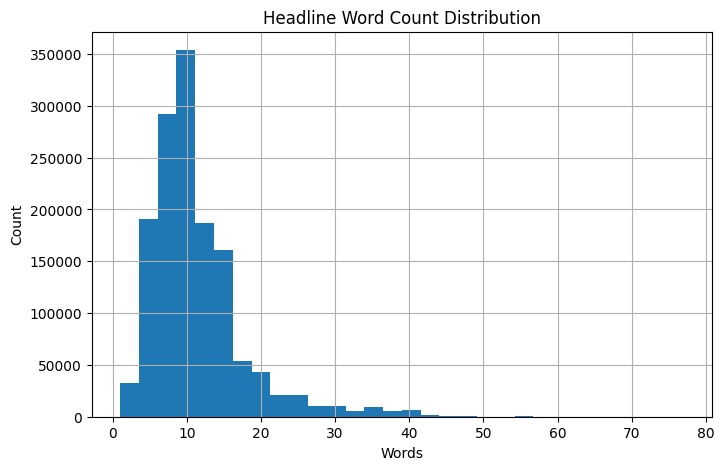

In [10]:
# Discriptive statistics 
data['headline_str'] = data['headline'].astype(str)
data['headline_len'] = data['headline_str'].str.split().str.len()
data['headline_len'].describe()

# Plot histogram
plt.figure(figsize=(8,5))
data['headline_len'].hist(bins=30)
plt.title('Headline Word Count Distribution')
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


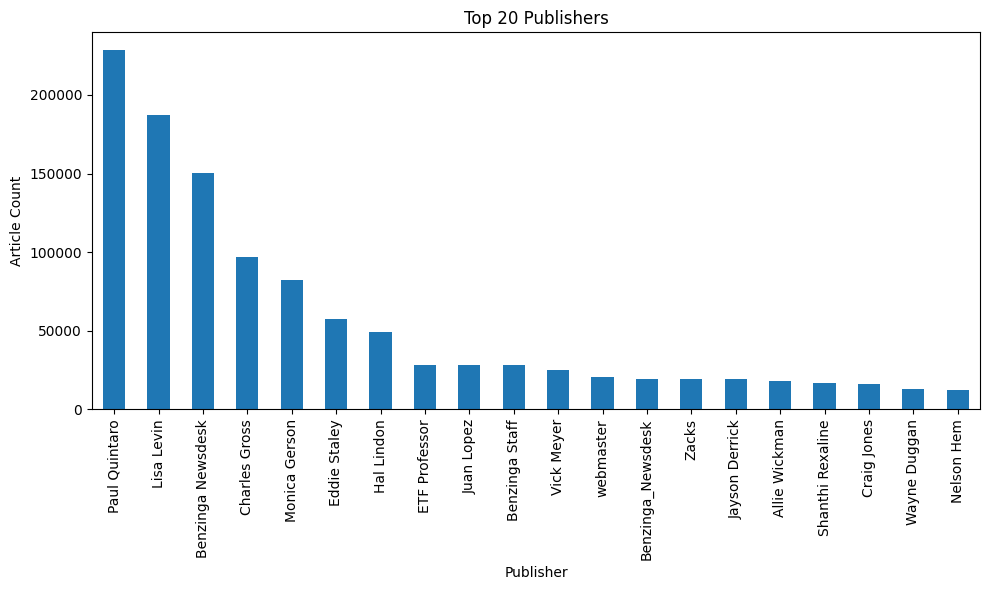

In [17]:
from pathlib import Path

publisher_counts = data["publisher"].value_counts()
print(publisher_counts.head(20))

# Ensure output directory exists before saving
output_dir = Path("../data/cleaned")
output_dir.mkdir(parents=True, exist_ok=True)

publisher_counts.to_csv(output_dir / "publisher_counts.csv")
top_publishers = publisher_counts.head(20)
plt.figure(figsize=(10,6))
top_publishers.plot(kind="bar")
plt.xlabel("Publisher")
plt.ylabel("Article Count")
plt.title("Top 20 Publishers")
plt.tight_layout()
plt.show()
plt.savefig("../data/cleaned/top_publishers.png")
plt.close()


In [18]:
# Topic Modeling with NMF
tfidf = TfidfVectorizer(stop_words="english", max_features=5000)
X = tfidf.fit_transform(data["headline"])
nmf = NMF(n_components=6, random_state=42)
nmf.fit(X)

feature_names = tfidf.get_feature_names_out()
for i, topic in enumerate(nmf.components_):
    top_words = [feature_names[j] for j in topic.argsort()[:-11:-1]]
    print(f"Topic {i}:", top_words)


Topic 0: ['moving', 'session', 'market', 'stocks', 'pre', 'mid', 'day', 'wednesday', 'tuesday', 'thursday']
Topic 1: ['vs', 'est', 'eps', 'reports', 'sales', 'q4', 'q2', 'q1', 'q3', 'adj']
Topic 2: ['benzinga', 'upgrades', 'downgrades', 'initiations', '2019', '2017', 'gainers', 'premarket', '2018', 'volume']
Topic 3: ['52', 'week', 'stocks', 'hit', 'highs', 'lows', 'hitting', 'new', 'set', 'yesterday']
Topic 4: ['earnings', 'scheduled', 'february', '2018', '2019', '2016', '2017', 'august', '2014', '2015']
Topic 5: ['pt', 'maintains', 'target', 'price', 'raises', 'buy', '00', 'initiates', 'lowers', 'coverage']


C:\Users\eyaze\AppData\Local\Temp\ipykernel_9844\3475768132.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data["date"] = pd.to_datetime(data["date"], errors="coerce", infer_datetime_format=True)


hour
0.0      131
1.0       82
2.0       48
3.0       27
4.0       67
5.0       14
6.0       57
7.0       93
8.0     1469
9.0     1829
10.0    2476
11.0    5033
12.0    5527
13.0    5965
14.0    7669
15.0    5701
16.0    5732
17.0    2710
18.0    2075
19.0    1612
20.0    3939
21.0    2800
22.0     704
23.0     227
dtype: int64
date
2011-04-28 00:00:00+00:00      3
2011-04-29 00:00:00+00:00      2
2011-04-30 00:00:00+00:00      1
2011-05-01 00:00:00+00:00      1
2011-05-02 00:00:00+00:00      9
                            ... 
2020-06-07 00:00:00+00:00     25
2020-06-08 00:00:00+00:00    765
2020-06-09 00:00:00+00:00    803
2020-06-10 00:00:00+00:00    807
2020-06-11 00:00:00+00:00    544
Length: 3333, dtype: int64


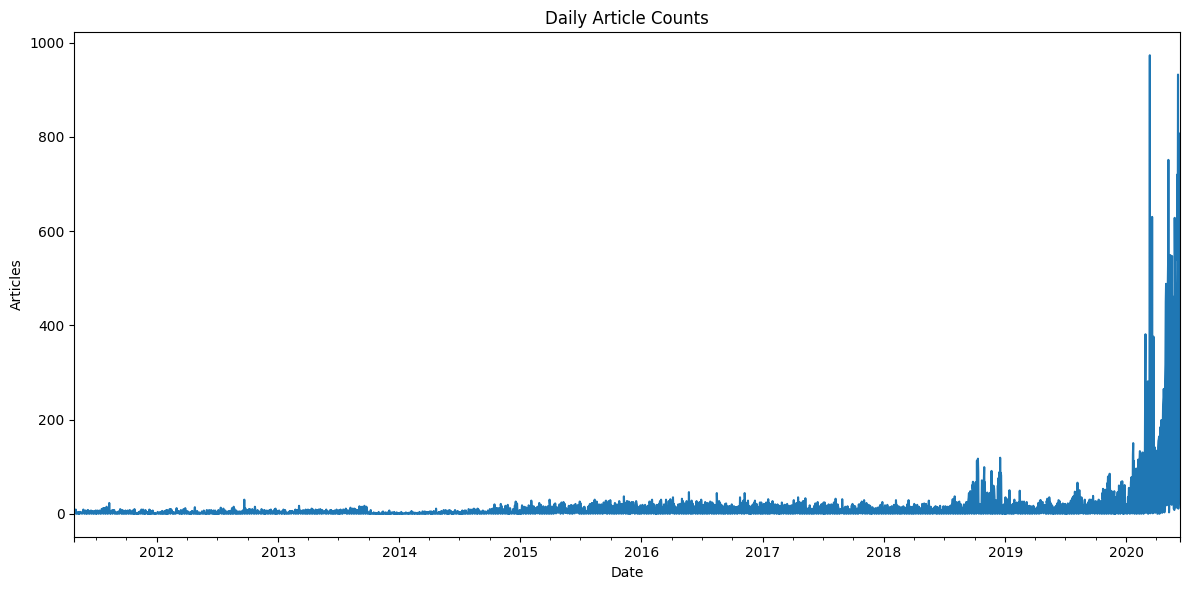

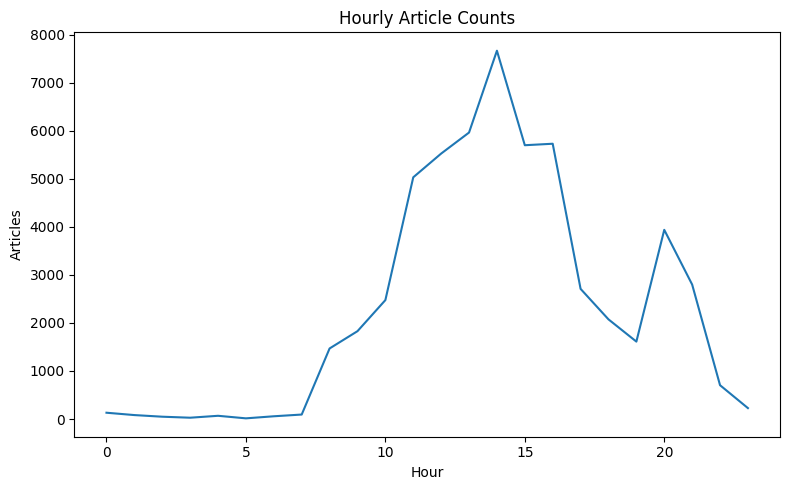

In [20]:
# Time Series Analysis
data["date"] = pd.to_datetime(data["date"], errors="coerce", infer_datetime_format=True)
data["date"] = pd.to_datetime(data["date"], utc=True)
data["hour"] = data["date"].dt.hour
hourly_counts = data.groupby("hour").size()
daily_counts = data.set_index("date").resample("D").size()
print(hourly_counts)
print(daily_counts)

# Daily counts
plt.figure(figsize=(12,6))
daily_counts.plot()
plt.xlabel("Date")
plt.ylabel("Articles")
plt.title("Daily Article Counts")
plt.tight_layout()
plt.savefig(output_dir / "daily_counts_plot.png")
plt.show()
plt.close()

# Hourly counts
plt.figure(figsize=(8,5))
hourly_counts.plot()
plt.xlabel("Hour")
plt.ylabel("Articles")
plt.title("Hourly Article Counts")
plt.tight_layout()
plt.savefig(output_dir / "hourly_counts_plot.png")
plt.show()
plt.close()

In [24]:
# Publisher Domain Analysis
data["domain"] = data["publisher"].apply(lambda x: x.split("@")[1] if "@" in x else "not_email")
domain_counts = data["domain"].value_counts()
print(domain_counts)

domain_counts.to_csv(output_dir / "publisher_domain_counts.csv")


domain
not_email                 1399240
benzinga.com                 7937
gmail.com                     139
andyswan.com                    5
investdiva.com                  2
tothetick.com                   2
eosdetroit.io                   1
forextraininggroup.com          1
stockmetrix.net                 1
Name: count, dtype: int64
